In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AI_Course/Math_AI/Code

/content/drive/MyDrive/AI_Course/Math_AI/Code


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [ ]:
df['Classification'].value_counts()
df['Classification'] -= 1

In [ ]:
Y_data = df['Classification'].values.reshape(-1, 1)
X_data = df.drop(columns = ['Classification'])
print(X_data.shape)
print(Y_data.shape)

(116, 9)
(116, 1)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.15, random_state = 42)

In [ ]:
#   Build tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
my_tree = DecisionTreeClassifier(criterion = 'entropy')
my_tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#   Predict on test_data
Y_pred = my_tree.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[9 2]
 [0 7]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


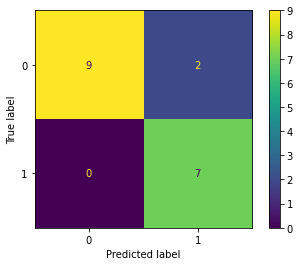

In [ ]:
plot_confusion_matrix(my_tree, X_test, Y_test);

In [ ]:
df_reg = pd.read_csv('datareg.csv')
df_reg.head()

,Product,Cost,Profit
0,'Asset Flip',100,1000
1,'Text Based',500,3000
2,'Visual Novel',1500,5000
3,'2D Pixel Art',3500,8000
4,'2D Vector Art',5000,6500


In [ ]:
#   Create data
X = df_reg['Cost'].values.reshape(-1, 1)
Y = df_reg['Profit'].values.reshape(-1, 1)

In [ ]:
reg_tree = DecisionTreeRegressor()
reg_tree.fit(X, Y)

DecisionTreeRegressor()

In [ ]:
#    Predict
X_test = [[4500]]
Y_pred = reg_tree.predict(X_test)
Y_pred

array([6500.])

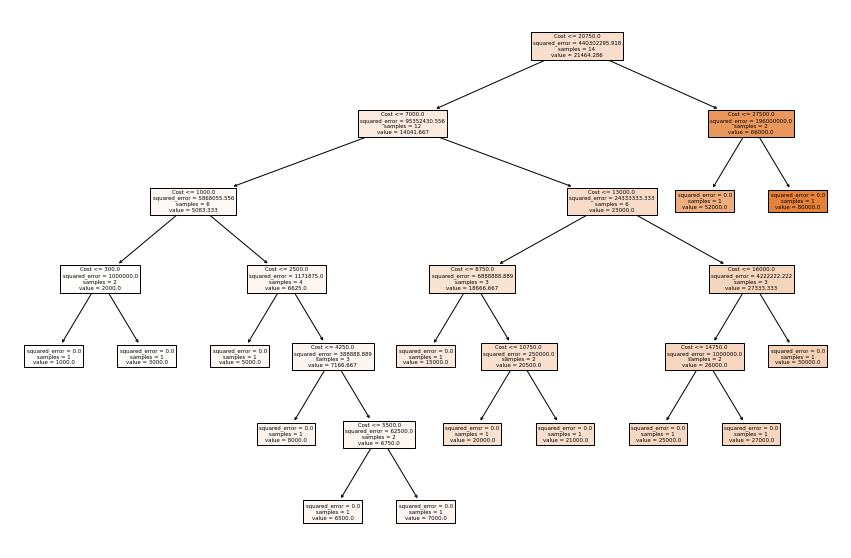

In [ ]:
#   Drawing tree
from sklearn import tree
fig = plt.figure(figsize = (15, 10))
_ = tree.plot_tree(reg_tree, feature_names = ['Cost'], class_names = ['Profit'], filled = True)

## ***Decision Tree Regressor***